# Projeto - Módulo 2
Integrantes: Luana Nunes, Daiane Ribeiro de Souza, Sarah David Müzel e Paulo Muraro Ferreira

# Descrição  dos Dados

Esse trablho é sobre o dataset: Heart Failure Prediction, disponível no **kaggle** <a href="https://www.kaggle.com/andrewmvd/heart-failure-clinical-data?select=heart_failure_clinical_records_dataset.csv"> </a>.

As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo.
A insuficiência cardíaca é um evento comum causado por DCVs e este conjunto de dados contém 12 paraparâmetros sobre 299 pacientes que sofreram parada cardíaca. 

Todos os pacientes apresentavam histórico de disfunção sistólica ventricular esquerda. Sendo classificados nos grupos de risco 3 ou 4 de acordo com 
a classificação de estágio de falência cardíaca da New York Heart Association (NYHA). Os dados foram coletados durante o período de acompanhamento dos pacientes.

A maioria das doenças cardiovasculares pode ser prevenida abordando os fatores de risco comportamentais, como uso de tabaco, dieta não saudável e obesidade, sedentarismo e uso nocivo de álcool, usando estratégias para toda a população.

<br>

**Artigo original: Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020).**


In [6]:
!pip install pandas_profiling

Using legacy 'setup.py install' for htmlmin, since package 'wheel' is not installed.
Using legacy 'setup.py install' for imagehash, since package 'wheel' is not installed.
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
    Running setup.py install for imagehash: started
    Running setup.py install for imagehash: finished with status 'done'
    Running setup.py install for htmlmin: started
    Running setup.py install for htmlmin: finished with status 'done'


You should consider upgrading via the 'c:\users\daiane\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# Conhecendo os Dados

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, RadioButtons, CheckButtons
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

import statsmodels.api as sm
from statsmodels.formula.api import ols

from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

In [8]:
heart = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv")
heart.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
sns.pairplot(heart, hue='DEATH_EVENT');

Através de uma verificação dos dados, observa-se que:
- Não há presença de dados nulos
- Que ao todo, tem-se os dados de 299 pacientes que sofreram um infarto
- Foram analisados 12 fatores principais (variáveis de entrada).
- A variável resposta estudada é a morte dos pacientes que sofreram um infarto.

Os fatores analisados são:

- age: Idade dos pacientes 
- anaemia: Se os pacientes tem anemia (N=0, S=1)
- creatinine_phosphokinase: Nível da enzima CPK no sangue (mcg/L)
- diabetes: Se o paciente tem diabetes (N=0, S=1)
- ejection_fraction: Porcentagem de sangue saindo do coração a cada contração (porcentagem)  
- high_blood_pressure: Se o paciente tem pressão alta (N=0, S=1)
- platelets: Plaquetas no sangue (quilo de plaquetas/mL)   
- serum_creatinine: Nível de creatinina sérica no sangue (mg/dL)
- serum_sodium: Nível de sódio sérico no sangue (mEq/L)       
- sex: Sexo dos pacientes (M=0 e H=1)  
- smoking: Se o paciente é fumante (N=0, S=1)      
- time: Período de acompanhamento (dias)

A variável resposta analisada é:

- DEATH_EVENT: Se o paciente faleceu durante o período de acompanhamento



# Relatório dos dados

In [7]:
profile = ProfileReport(heart)

In [8]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# salvando o relatório no disco
#profile.to_file(output_file="Relatorio - Dataset Heart Failure.html")

## Estatística descritiva

In [10]:
heart.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

Por meio da estatística descritiva, observa-se que os pacientes estudados tinham:
- Idade mínima = 40 anos
- Idade média = 60 anos 
- Idade máxima = 95 anos

Sendo que 75% do dataset consiste em pacientes com menos de 70 anos.

In [11]:
# Analisando variável resposta

qtdd_vivo = len(heart[heart["DEATH_EVENT"] == 0]) # determinar a quantidade de pacientes vivos
qtdd_mortos= len(heart[heart['DEATH_EVENT'] == 1])  # determinar a quantidade de pacientes que faleceram

print(f'Quantidade de pacientes que sobreviveram:{qtdd_vivo}\nQuantidade de pacientes que faleceram: {qtdd_mortos}')

Quantidade de pacientes que sobreviveram:203
Quantidade de pacientes que faleceram: 96


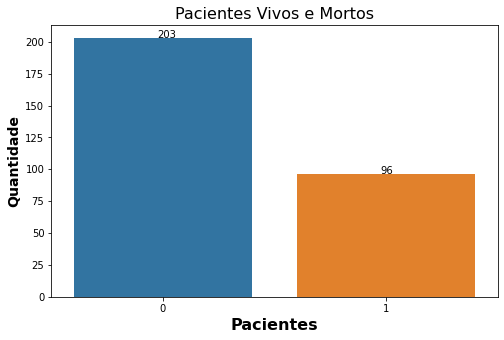

In [12]:
plt.figure (figsize= (8,5)) 
fig_mortes= sns.countplot(data=heart, x=heart["DEATH_EVENT"])

for p, label in zip(fig_mortes.patches, heart['DEATH_EVENT'].value_counts()):  # para add os rótulos nas barras
    fig_mortes.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))
    
fig_mortes.set_title('Pacientes Vivos e Mortos', fontsize = 16)# nome do título
fig_mortes.set_ylabel('Quantidade', fontsize=14, fontweight = 'bold') # título do eixo y
fig_mortes.set_xlabel('Pacientes', fontsize=16, fontweight = 'bold') # título do eixo x

plt.show()

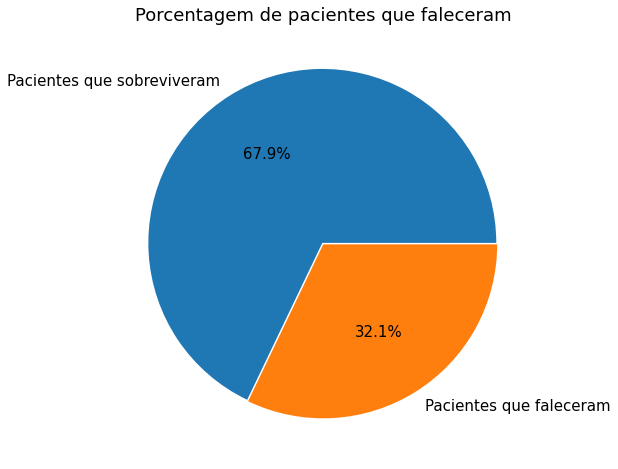

In [13]:
# Criando um gráfico de pizza para ver a distribuição dos dados
fig_porcentagem_mortes = heart['DEATH_EVENT'].value_counts()
plt.figure (figsize= (7,8)) # função do matplotlib que muda o tamanho da imagem
labels = ['Pacientes que sobreviveram', 'Pacientes que faleceram'] # colocar o nome em cada fatia
plt.axis ('equal') # para o gráfico sair circular e não oval
plt.title ('Porcentagem de pacientes que faleceram', fontsize=18)  # título do gráfico
explode = [0.01, 0] # deixar uma parte em evidência

# autopct -> mostra os valores em %
plt.pie(fig_porcentagem_mortes, labels=labels, explode = explode, textprops={'fontsize': 15},autopct='%1.1f%%')
plt.show()

Analisando o dataset, verifica-se que dentre os 299 pacientes que sofreram infarto, 96 pacientes foram a óbito, o que representa aproximadamente 32% do total de pacientes.

## Correlação

- Pearson : standard correlation coefficient
- Kendall : Kendall Tau correlation coefficient
- Spearman : Spearman rank correlation

<br>

* O coeficiente de correlação varia de `-1` a `1`. Se valor é próximo de 1, isto significa que existe uma forte correlação positiva entre as variáveis. Quando esse número é próximo de -1, as variáveis tem uma forte correlação negativa.
<br><br>
    -  **Resistência**: Quanto maior for o valor absoluto do coeficiente, mais forte é a relação entre as variáveis. Para a correlação de Pearson, um valor absoluto de 1 indica uma relação linear perfeita. A correlação perto de 0 indica que não há relação linear entre as variáveis.
<br><br>
    - **Direção**: O sinal de cada coeficiente indica a direção da relação. Se ambas as variáveis tendem a aumentar ou diminuir em conjunto, o coeficiente é positivo, e a linha que representa a correlação inclina para cima. Se uma variável tende a aumentar à medida que os outras diminuem, o coeficiente é negativo, e a linha que representa a correlação inclina para baixo.
    <br><br>
* Relação nula: r = 0
* Relação fraca: r ~ 0,3
* Relação moderada: r ~ 0,5
* Relação Forte: r > 0,7
 <br>

**Considere os seguintes pontos ao interpretar o coeficiente de correlação:**
* Nunca é adequado concluir que as mudanças em uma variável causam mudanças em outra variável com base apenas na correlação. Somente experimentos adequadamente controlados permitem que você determine se uma relação é causal.


* Um coeficiente de correlação de Pearson baixo não significa que não existe nenhuma relação entre as variáveis. As variáveis podem ter uma relação não linear.  Nesse caso é valido realizar uma análise da correlação de Spearman, a qual avalia a relação monotônica entre duas variáveis contínuas ou ordinais, ou seja, as variáveis tendem a mudar juntas mas não necessariamente a uma taxa constante. O coeficiente de correlação de Spearman baseia-se nos valores classificados de cada variável, em vez de os dados brutos. Outra análise possível é a correlação de Kendall, que deve ser utilizada com dados ordinais de três ou mais níveis.

A correlação de Spearman, é uma medida de correlação não-paramétrica. Ao contrário do coeficiente de correlação de Pearson não requer a suposição que a relação entre as variáveis é linear, nem requer que as variáveis sejam quantitativas, pode ser usado para as variáveis medidas no nível ordinal. 

A correlação de Kendall é uma medida de associação para variáveis ordinais. Uma vantagem de Kendall sobre Spearman é que Kendall pode ser generalizado para um coeficiente de correlação parcial.



### Correlação de Pearson

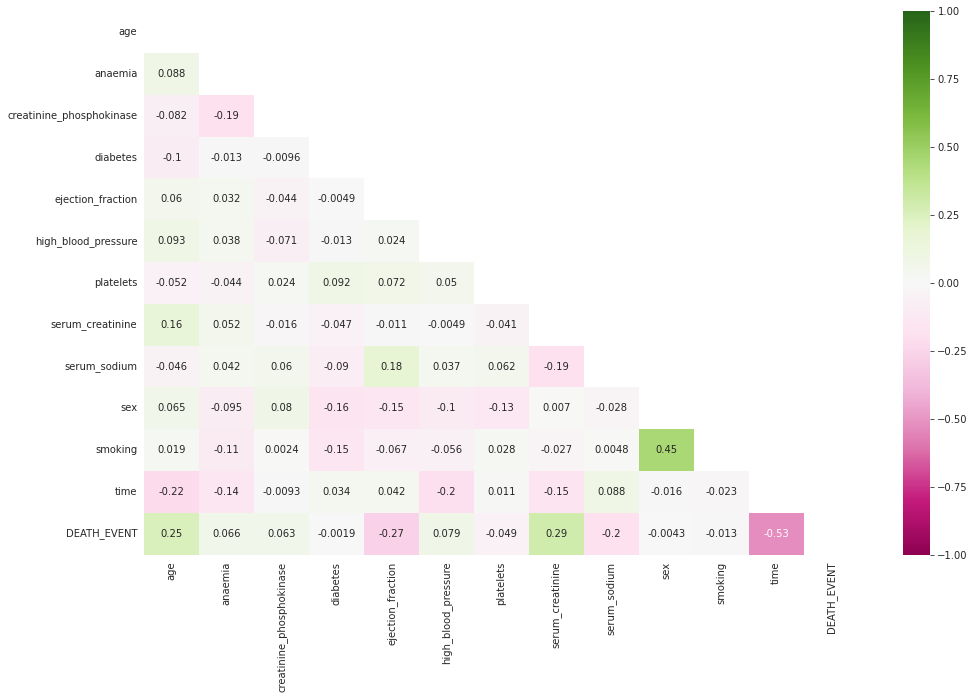

In [14]:
# para facilitar a visualização dessa correlação podemos criar um gráfico usando o método heatmap seaborn
# no qual vai aparacer o valor de cada um das correlações dentro dos quadrados.

# 1- gerando a correlação de Perason
correlacao_pearson = heart.corr()

#2- Gerando mapa heatmap
mask = np.zeros_like(correlacao_pearson)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16,10))
    ax = sns.heatmap(correlacao_pearson, mask=mask, annot=True, vmin=-1, vmax=1,cmap="PiYG")

Pela correlação de Pearson, observa-se que há correlações entre:
- smoking*sex = moderadas positiva
- time*death = moderadas negativa
- creatinine*death = fraca positiva
- age*death = fraca positiva
- ejection*death = fraca negativa

### Correlação de Spearman's 

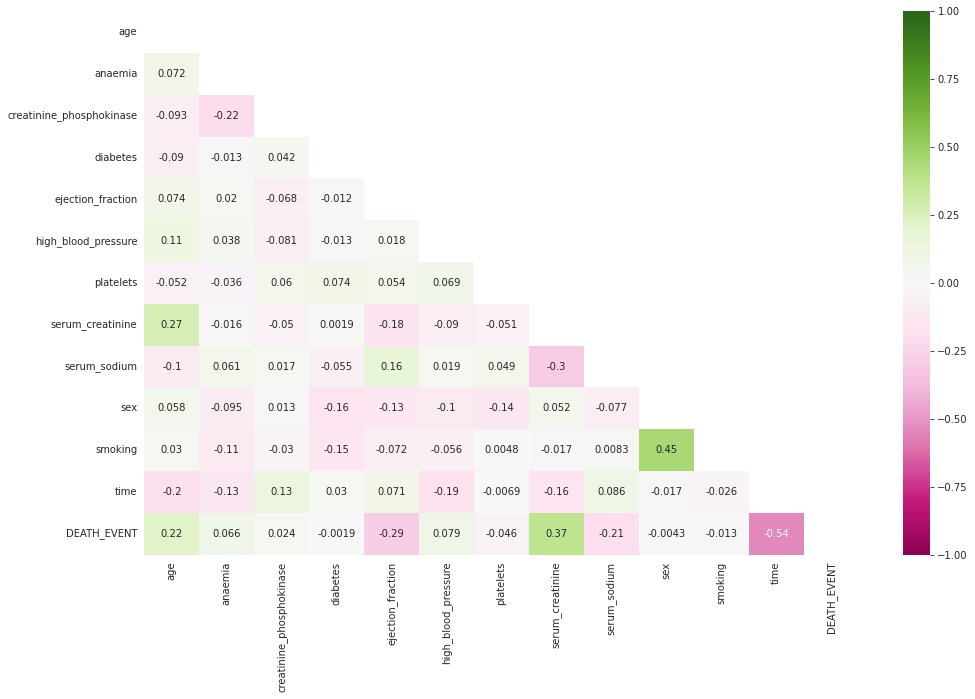

In [15]:
# 1- gerando a correlação de Spearman
correlacao_spearman = heart.corr(method='spearman')

#2- Gerando mapa heatmap
mask = np.zeros_like(correlacao_spearman)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16,10))
    ax = sns.heatmap(correlacao_spearman, mask=mask, annot=True, vmin=-1, vmax=1,cmap="PiYG")

Pela correlação de Spearman, observa-se que há correlações entre:

- smoking*sex = moderadas positiva
- time*death = moderadas negativa
- creatinine*death = fraca positiva
- ejection*death = fraca negativa
- sodium*creatinine = fraca negativa
- creatinine*age = fraca positiva

### Correlação de Kendall

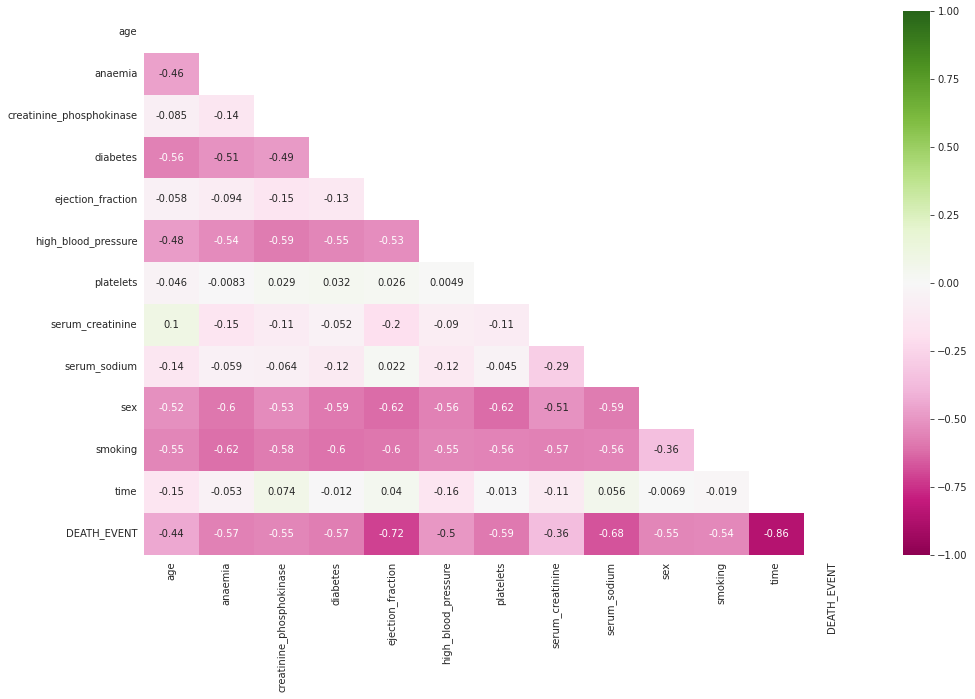

In [16]:
# 1- gerando a correlação de kendall
correlacao_kendall = heart.corr(method='kendall')

#2- Gerando mapa heatmap
mask = np.zeros_like(correlacao_kendall)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16,10))
    ax = sns.heatmap(correlacao_kendall, mask=mask, annot=True, vmin=-1, vmax=1,cmap="PiYG")

Pela correlação de Kendall, observa-se que:

- Death_event tem uma correlação negativa com todos os fatores estudados, sendo que:
    
    * creatinine = fraca
    * age = moderada
    * anemia = moderada
    * CPK= moderada
    * diabetes= moderada
    * hbp = moderada
    * plaquetas= moderada
    * sodium= moderada
    * sex= moderada
    * smoking=moderada  
    * ejection = forte 
    * time= forte
<br>
- Entre os fatores estudados nota-se que muitos de correlacionam negativamente, sendo os fatores que apresentam uma correlação são:
    * age 
    * anemia 
    * diabete
    * hbp
    * sex
    * smoking



# Analisando as correlações do fatores com DEATH_EVENT

Por meio dos gráficos de correlação é possível observar que a morte ter relação com diversos fatores.
Sendo assim serão verificados a distribuição dados de todos os fatores principais com a variável DEATH_EVENT

## Idade

Analisando a idades dos pacientes infartados

In [17]:
# convertendo o tipo de dado da coluna age para inteiro
heart = heart.astype({"age": int})

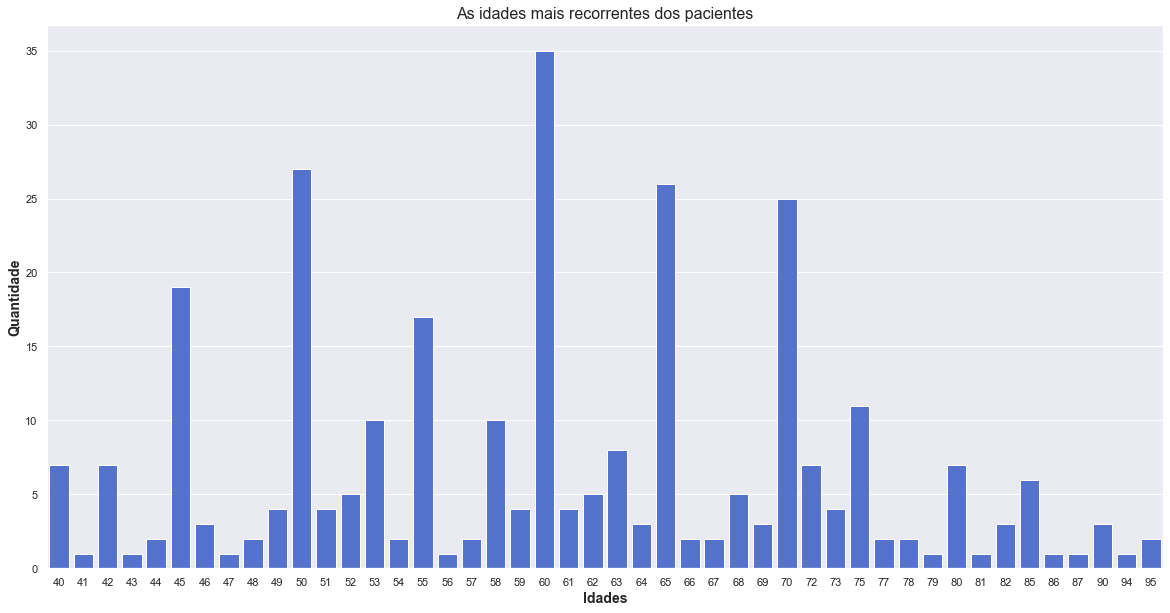

In [18]:
sns.set() # para trazer a configuração padrão do gráfico do seaborn que o colab não está importando
plt.figure(figsize= (20, 10)) # função do matplotlib que muda o tamanho da imagem
dist_age= sns.countplot(data=heart, x=heart['age'], palette=['#4169E1']) # criar gráfico


dist_age.set_title('As idades mais recorrentes dos pacientes', fontsize = 16) # nome do título
dist_age.set_ylabel('Quantidade', fontsize=14, fontweight = 'bold')
dist_age.set_xlabel('Idades', fontsize=14, fontweight = 'bold')

plt.show()

Nota-se que as idades que mais se repedem são 45, 50, 55, 60, 65 e 70 anos de idade

In [2]:
legenda = ['Sobrevintes', 'Falecidos']
fig1_hist_age=px.histogram(data_frame=heart,x="age",nbins=120,title="Idades dos pacientes que faleceram/sobreviveram",color="DEATH_EVENT")
fig1_hist_age.show()

NameError: name 'heart' is not defined

Para compreender melhor a distribuição das faixas etárias dentro do grupo de pacientes análisado, os dados foram dividios em 5 grupos de idade.

In [20]:
heart['grupos_idades'] = pd.qcut(heart.age, 5, precision = 0)
heart.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75        0                       582         0                 20   
1   55        0                      7861         0                 38   
2   65        0                       146         0                 20   
3   50        1                       111         0                 20   
4   65        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT grupos_idades  
0        0     4            1  (70.0, 95.0]  
1        0     6            1  (50.0, 58.0]  
2        1     7            1  (63.0, 70.0]  
3        0     7            1  (39.0, 50.0]  
4        0     8            1  (63.0, 70.0]

In [21]:
# verifiando os grupos criados e a quantidade de pacientes dentro de cada grupo
heart['grupos_idades'].value_counts()

(39.0, 50.0]    74
(63.0, 70.0]    66
(58.0, 63.0]    56
(70.0, 95.0]    52
(50.0, 58.0]    51
Name: grupos_idades, dtype: int64

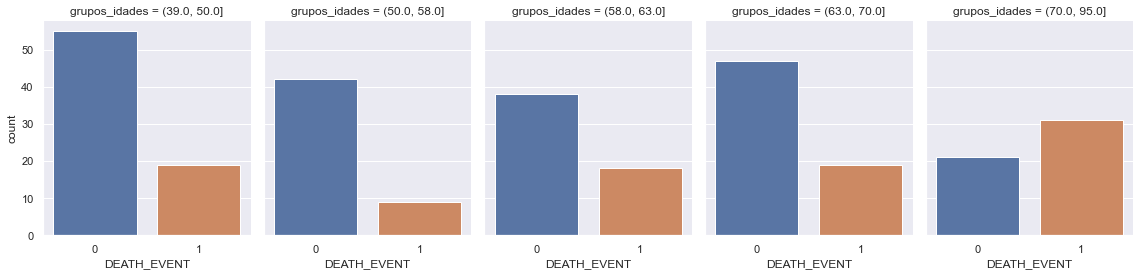

In [22]:
fig_idade = sns.catplot(x="DEATH_EVENT", col="grupos_idades", kind="count", data=heart, height=4, aspect=.8)
plt.show()

In [23]:
# análisando a porcentagem de mortes dentro de cada grupo etário
morte_por_idade = heart.groupby(['grupos_idades'])[['DEATH_EVENT']].apply(lambda x: x.sum()/heart[['DEATH_EVENT']].sum())
(morte_por_idade*100).style.format('{0:,.1f}%')

É possível observar que a maioria dos óbitos ocorreu no grupo entre 70 e 95 anos de idade.
E a menor quantidade de mortes foi entre 50 e 58 anos

## Fumantes

Analisando o habito de fumar dos pacientes infartados

In [24]:
qtd_fumantes = heart['smoking'].sum() # determinar a quantidade de fumantes
qtd_nao_fumantes = (heart['smoking'] == 0).sum() # determinar a quantidade de não fumantes

fumantes_mortos = len(heart[(heart['smoking']==1) & (heart['DEATH_EVENT']==1)]) #  determinar a quantidade de fumantes que faleceram
fumantes_nao_mortos = len(heart[(heart['smoking']==1) & (heart['DEATH_EVENT']==0)]) # determinar a quantidade de fumantes que não faleceram

print(f'Quantidade de Fumantes: {qtd_fumantes} \nQuantidade de não-fumantes: {qtd_nao_fumantes}')
print(f'Quantidade de fumantes que faleceram: {fumantes_mortos} \nQuantidade fumantes que não faleceram: {fumantes_nao_mortos} ')


Quantidade de Fumantes: 96 
Quantidade de não-fumantes: 203
Quantidade de fumantes que faleceram: 30 
Quantidade fumantes que não faleceram: 66 


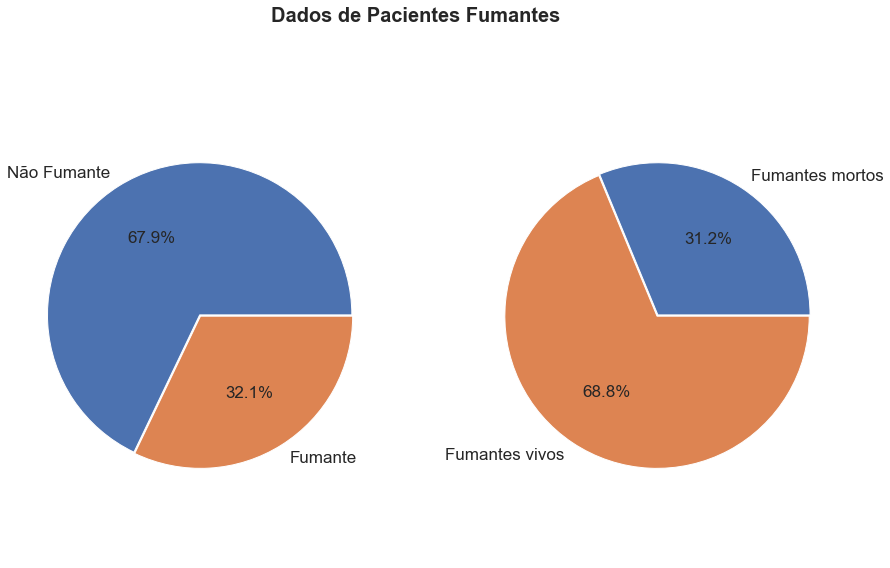

In [25]:
fig,ax=plt.subplots(1,2,figsize=(15,9))
plt.suptitle('Dados de Pacientes Fumantes', fontsize=20, fontweight='bold')

fumantes1 = heart['smoking'].value_counts()
fumantes2 = [fumantes_mortos, fumantes_nao_mortos]

labels1 = ['Não Fumante', 'Fumante'] 
labels2 = ['Fumantes mortos', 'Fumantes vivos']
  

plt.axis ('equal') 
explode = [0.01, 0] 

ax[0].pie(fumantes1, labels=labels1, explode = explode, textprops={'fontsize': 17},autopct='%1.1f%%')
ax[1].pie(fumantes2, labels=labels2, explode = explode, textprops={'fontsize': 17},autopct='%1.1f%%')
plt.show()

Nota-se que maioria dos pacientes não eram fumantes, e dos fumantes somente 31,2% faleceram

## Pressão alta
Análisando os pacientes com pressão alta (HBP)

In [26]:
qtd_hbp = heart['high_blood_pressure'].sum() # determinar a quantidade de pacientes com pressão alta
qtd_nao_hbp = (heart['high_blood_pressure'] == 0).sum() # determinar a quantidade de pacientes sem pressão alta

hbp_mortos = len(heart[(heart['high_blood_pressure']==1) & (heart['DEATH_EVENT']==1)]) #  determinar a quantidade de pacientes com pressão alta que faleceram
hbp_nao_mortos = len(heart[(heart['high_blood_pressure']==1) & (heart['DEATH_EVENT']==0)]) # determinar a quantidade de pacientes sem pressão altas que não faleceram

print(f'Quantidade de pacientes com pressão alta: {qtd_hbp} \nQuantidade de pacientes sem pressão alta: {qtd_nao_hbp}')
print(f'Quantidade de pacientes com pressão alta que faleceram: {hbp_mortos} \nQuantidade de pacientes com pressão alta que não faleceram: {hbp_nao_mortos} ')


Quantidade de pacientes com pressão alta: 105 
Quantidade de pacientes sem pressão alta: 194
Quantidade de pacientes com pressão alta que faleceram: 39 
Quantidade de pacientes com pressão alta que não faleceram: 66 


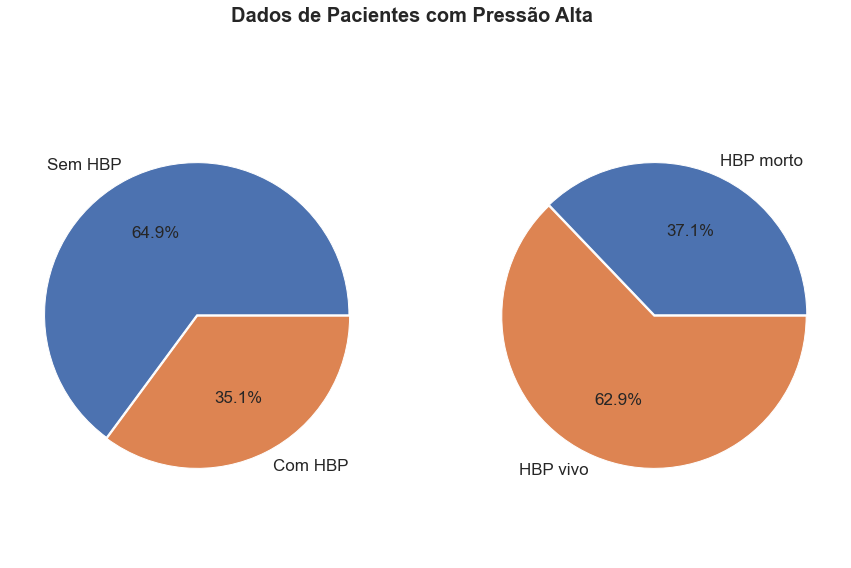

In [27]:
fig,ax=plt.subplots(1,2,figsize=(15,9))
plt.suptitle('Dados de Pacientes com Pressão Alta', fontsize=20, fontweight='bold')

hbp1 = heart['high_blood_pressure'].value_counts()
hbp2 = [hbp_mortos, hbp_nao_mortos]

labels1 = ['Sem HBP', 'Com HBP'] 
labels2 = ['HBP morto', 'HBP vivo']

plt.axis ('equal')
explode = [0.01, 0]

ax[0].pie(hbp1, labels=labels1, explode = explode, textprops={'fontsize': 17},autopct='%1.1f%%')
ax[1].pie(hbp2, labels=labels2, explode = explode, textprops={'fontsize': 17},autopct='%1.1f%%')
plt.show()

Apesar de ser dito que a pressão alta está muito relacionada com pessoas que morrem de infarto e/ou possuem doenças do corração, a maioria dos pacientes não possuia pressão alta. E dos que tinham somente 37,1% falaceram.

## Diabetes

Análisando os pacientes com diabetes

In [28]:
qtd_diabeticos = heart['diabetes'].sum() #determinar a quantidade de pacientes com diabetes
qtd_nao_diabeticos = (heart['diabetes'] == 0).sum() # determinar a quantidade de pacientes sem diabetes

diabeticos_mortos = len(heart[(heart['diabetes']==1) & (heart['DEATH_EVENT']==1)]) #  determinar a quantidade de pacientes com diabetes que faleceram
diabeticos_nao_mortos = len(heart[(heart['diabetes']==1) & (heart['DEATH_EVENT']==0)]) # determinar a quantidade de pacientes sem diabetes que não faleceram

print(f'Quantidade de pacientes com diabetes: {qtd_diabeticos} \nQuantidade de pacientes sem diabetes: {qtd_nao_diabeticos}')
print(f'Quantidade de pacientes com diabetes que faleceram: {diabeticos_mortos} \nQuantidade de pacientes com diabetes que não faleceram: {diabeticos_nao_mortos}')

Quantidade de pacientes com diabetes: 125 
Quantidade de pacientes sem diabetes: 174
Quantidade de pacientes com diabetes que faleceram: 40 
Quantidade de pacientes com diabetes que não faleceram: 85


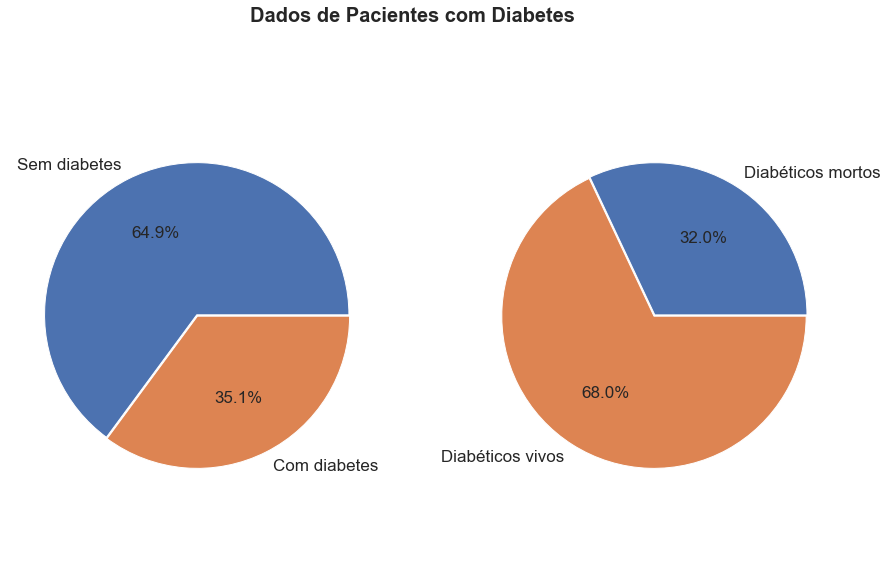

In [29]:
fig,ax=plt.subplots(1,2,figsize=(15,9))
plt.suptitle('Dados de Pacientes com Diabetes', fontsize=20, fontweight='bold')

diabete1 = heart['high_blood_pressure'].value_counts()
diabete2 = [diabeticos_mortos, diabeticos_nao_mortos]

labels1 = ['Sem diabetes', 'Com diabetes'] 
labels2 = ['Diabéticos mortos', 'Diabéticos vivos']

plt.axis ('equal')
explode = [0.01, 0]

ax[0].pie(diabete1, labels=labels1, explode = explode, textprops={'fontsize': 17},autopct='%1.1f%%')
ax[1].pie(diabete2, labels=labels2, explode = explode, textprops={'fontsize': 17},autopct='%1.1f%%')
plt.show()

Verificou-se que a maioria dos pacientes não possuia diabetes e dentre os que possuiam somente 32% faleceram

## Sexo

In [30]:
qtd_H = (heart['sex'] ==1).sum() #determinar a quantidade de pacientes homens
qtd_M = (heart['sex'] == 0).sum() # determinar a quantidade de pacientes mulheres

H_mortos = len(heart[(heart['sex']==1) & (heart['DEATH_EVENT']==1)]) #  determinar a quantidade de pacientes com diabetes que faleceram
M_mortos = len(heart[(heart['sex']==0) & (heart['DEATH_EVENT']==1)]) #  determinar a quantidade de pacientes com diabetes que faleceram

H_nao_mortos = len(heart[(heart['sex']==1) & (heart['DEATH_EVENT']==0)])# determinar a quantidade de pacientes sem diabetes que não faleceram
M_nao_mortos = len(heart[(heart['sex']==0) & (heart['DEATH_EVENT']==0)])# determinar a quantidade de pacientes sem diabetes que não faleceram

print(f'Quantidade de pacientes homens: {qtd_H} \nQuantidade de pacientes mulheres: {qtd_M}')
print(f'Quantidade de pacientes homens que faleceram: {H_mortos} \nQuantidade de pacientes homens que não faleceram: {H_nao_mortos}')
print(f'Quantidade de pacientes mulheres que faleceram: {M_mortos} \nQuantidade de pacientes mulheres que não faleceram: {M_nao_mortos}')


Quantidade de pacientes homens: 194 
Quantidade de pacientes mulheres: 105
Quantidade de pacientes homens que faleceram: 62 
Quantidade de pacientes homens que não faleceram: 132
Quantidade de pacientes mulheres que faleceram: 34 
Quantidade de pacientes mulheres que não faleceram: 71


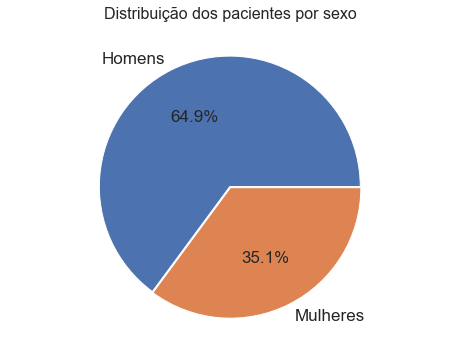

In [31]:
# % de pacientes por sexo

sexo = heart['sex'].value_counts()
plt.figure (figsize= (8, 6)) 
labels = ['Homens', 'Mulheres'] 
plt.axis ('equal') 
plt.title ('Distribuição dos pacientes por sexo', fontsize=16)  
explode = [0.01, 0] # deixar uma parte em evidencia
plt.pie(sexo, labels=labels, explode = explode, textprops={'fontsize': 17},autopct='%1.1f%%')
plt.show()

Constata-se que a maioria dos pacientes estudados eram homem, o que fará com que haja uma maior propensão de distrbuições de dados com homens falecidos.

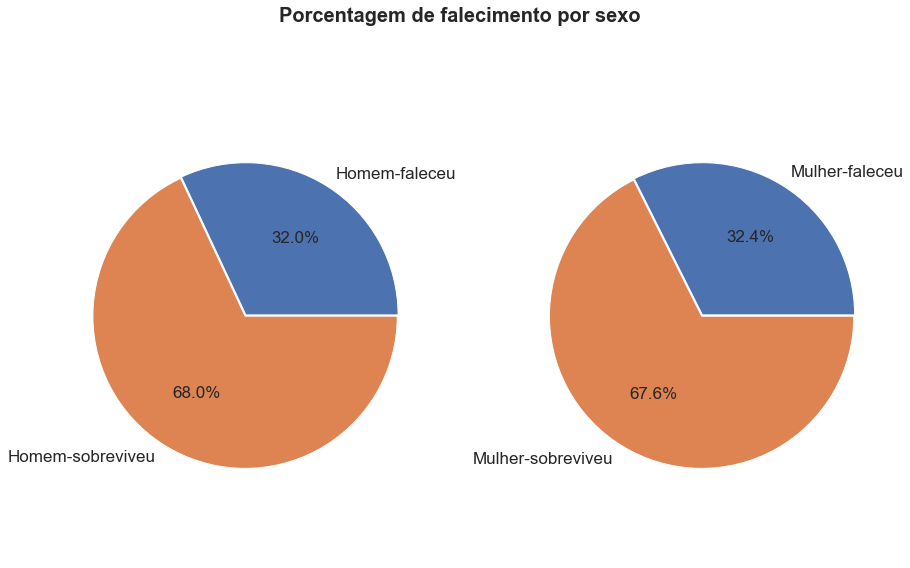

In [32]:
homens = [H_mortos, H_nao_mortos]
mulheres = [M_mortos, M_nao_mortos]

fig_sexo, ax = plt.subplots(1,2,figsize=(15, 9))
plt.suptitle('Porcentagem de falecimento por sexo', fontsize=20, fontweight='bold')
plt.axis ('equal') 
explode = [0.01, 0] 

label_H = ['Homem-faleceu', 'Homem-sobreviveu']
label_M = ['Mulher-faleceu', 'Mulher-sobreviveu']

ax[0].pie(homens, labels=label_H, explode = explode, textprops={'fontsize': 17},autopct='%1.1f%%')
ax[1].pie(mulheres, labels=label_M, explode = explode, textprops={'fontsize': 17},autopct='%1.1f%%')

plt.show()   

Dentro de cada sexo, nota-se que a porcentagem de obitos é semelhante, de aproximadamente 32%

## Anemia

In [33]:
qtd_anemicos = heart['anaemia'].sum() #determinar a quantidade de pacientes com diabetes
qtd_nao_anemicos = (heart['anaemia'] == 0).sum() # determinar a quantidade de pacientes sem diabetes

anemicos_mortos = len(heart[(heart['anaemia']==1) & (heart['DEATH_EVENT']==1)]) #  determinar a quantidade de pacientes com diabetes que faleceram
anemicos_nao_mortos = len(heart[(heart['anaemia']==1) & (heart['DEATH_EVENT']==0)])# determinar a quantidade de pacientes sem diabetes que não faleceram

print(f'Quantidade de pacientes com anemia: {qtd_anemicos} \nQuantidade de pacientes sem anemia: {qtd_nao_anemicos}')
print(f'Quantidade de pacientes com anemia que faleceram: {anemicos_mortos} \nQuantidade de pacientes com anemia que não faleceram: {anemicos_nao_mortos}')


Quantidade de pacientes com anemia: 129 
Quantidade de pacientes sem anemia: 170
Quantidade de pacientes com anemia que faleceram: 46 
Quantidade de pacientes com anemia que não faleceram: 83


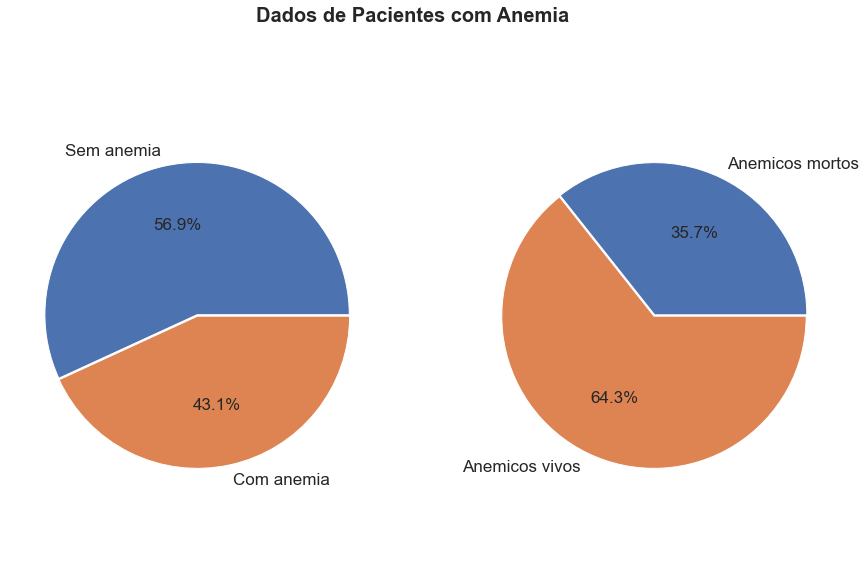

In [34]:
fig,ax=plt.subplots(1,2,figsize=(15,9))
plt.suptitle('Dados de Pacientes com Anemia', fontsize=20, fontweight='bold')

anemia1 = heart['anaemia'].value_counts()
anemia2 = [anemicos_mortos, anemicos_nao_mortos]

labels1 = ['Sem anemia', 'Com anemia'] 
labels2 = ['Anemicos mortos', 'Anemicos vivos']

plt.axis ('equal')
explode = [0.01, 0]

ax[0].pie(anemia1, labels=labels1, explode = explode, textprops={'fontsize': 17},autopct='%1.1f%%')
ax[1].pie(anemia2, labels=labels2, explode = explode, textprops={'fontsize': 17},autopct='%1.1f%%')
plt.show()

Com relação a anemia, nota-se que as porcentagens são proximas, pois quase metade dos pacientes possuia anemia. Porém ao verificar dentro dos pacientes anemicos a porcentagem de obitos, nota-se que somente 37,5% faleceram. 

## Creatinofosfoquinase
Análisando a creatinine phosphokinase (CPK) dos pacientes 

In [35]:
heart['creatinine_phosphokinase'].describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

In [36]:
fig_hist_CPK = px.histogram(heart, x=heart['creatinine_phosphokinase'], nbins=70, marginal="box", width=1000)
fig_hist_CPK.show()

É possivel notar que é uma grande quantidade de outlier no dados 

In [37]:
hist2_CPK=px.histogram(heart,x="creatinine_phosphokinase",nbins=60,color="DEATH_EVENT",height=500,width = 1000,marginal="violin")
hist2_CPK.show()

Ao plotar o gráfico em função da morte, nota-se que a a maioria dos pacientes que falecarm tinham entre 0 e 199 de CPK, e ao todo foram 40 pacientes que faleceram nessa condição.
Em seguida vem  23 pacinetes com 400 a 599 de CPK e  17 pacientes com 200 e 399 de CPK.

Ao comparar com a literatura, nota-se que os valores de referência da CPK são entre 30.00 U/L e 200.00 U/L para homens e entre 29.00 U/L e 168.00 U/L para mulheres. 

Com isso, nota-se que a pouco mais da metade das mortes ocorridas foram  acima da da faixa aceitavel. Já com relação ao mortes ocorridas entre 0 e 199 cpk devem ser análisadas com comparação com outros fatores para melhor compreensão.

## Fração de ejeção do sangue

Análisando os pacientes em função da ejection_fraction (EF).

In [38]:
heart['ejection_fraction'].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

In [39]:
fig_hist_ef = px.histogram(heart, x=heart['ejection_fraction'], nbins=30, marginal="box")
fig_hist_ef.show()

Varifica-se que há presença de outliers no dados, porém menos que no CPK.
A maioria dos pacientes analisados possui um EF entre 35 e 39. 

In [40]:
ef=px.histogram(heart,x="ejection_fraction",nbins=30,color="DEATH_EVENT", marginal="violin")
ef.show()

In [41]:
fig_ef = px.pie(heart, values="DEATH_EVENT",names="ejection_fraction",
                title='Porcentagem de mortes em função da ejeção de sangue', width=800, height=600)
fig_ef.show()


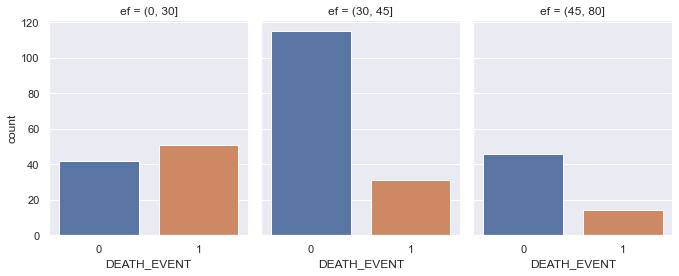

In [42]:
# Divisão em grupos de EF, com base no artigo
heart['ef'] = pd.cut(heart['ejection_fraction'], [0,30,45,80])
fig_gpEF = sns.catplot(x="DEATH_EVENT", col="ef", kind="count", data=heart, height=4, aspect=.8)
plt.show()

Análisando os obitos ocorridos, em função da EF, constata-se que quanto menor a EF maiores as changes do paciente falecer.
Sendo que a maioria das mortes ocorreu para EF = 20,25, 30 e 38.

## Palquetas
Análise das quantidade de plaquetas dos pacientes 

In [43]:
heart['platelets'].describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

In [44]:
fig_hist_plaquetas = px.histogram(heart, x=heart['platelets'], nbins=70, marginal="box")
fig_hist_plaquetas.show()

Verifica-se que há uma grande quantidade de outliers nos dados de plaquetas dos pacientes.
Segudo o boxplot, valores abaixo de 75k e 427k podem ser consideram como outlier. 
Dentro dos dados considerados  normias, a faixa predominate de 260k a 279K

In [45]:
plaquetas=px.histogram(heart,x="platelets",nbins=30,color="DEATH_EVENT", marginal="violin")
plaquetas.show()

Observa-se que a mairoa das mortes ocorreu quando a plaqueta era entre 225k e 274k (48 mortes)

In [46]:
heart['pt'] = pd.qcut(heart["platelets"], 3, precision=0)
heart.pt.value_counts()

(25099.0, 226000.0]     103
(278333.0, 850000.0]    100
(226000.0, 278333.0]     96
Name: pt, dtype: int64

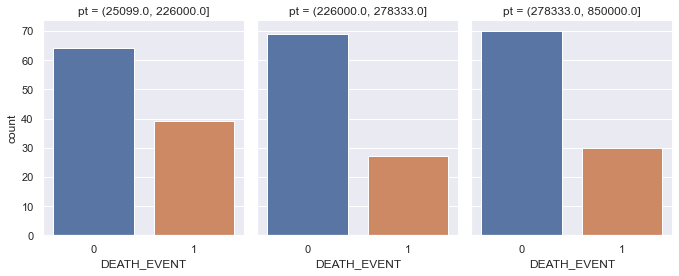

In [47]:
sns.catplot(x="DEATH_EVENT", col="pt", kind="count", data=heart, height=4, aspect=.8)
plt.show()

Pela análise dos grupos criados, a maioria dos osbtitos ocorre quando a plaqueta é entre 25.099 e 226.000

## Creatinina sérica
Análise da serum_creatinine (SC) dos pacientes

In [48]:
heart['serum_creatinine'].describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

In [49]:
fig_hist_SC = px.histogram(heart, x=heart['serum_creatinine'], nbins=70, marginal="box")
fig_hist_SC.show()

Novamente nota-se uma grande quantidade de outlier nos dados, sendo considerado  um outlier SC>2,1.
Os valores de SC mais frequente são entre 1 e 1,19.

Segundo a literatura, valores acima de 1,5 são considerados anormais e que o paciente deve ter uma disfunção renal.

In [50]:
sc=px.histogram(heart, x="serum_creatinine",nbins=30,color="DEATH_EVENT", marginal="violin")
sc.show()

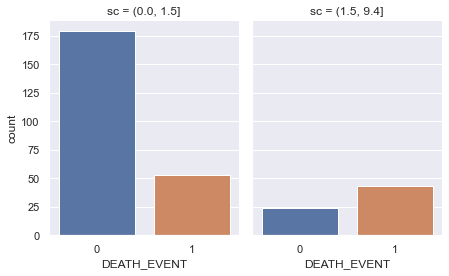

In [51]:
# divisão em grupos de SC, com base no artigo ( niveis normais de SC <1,5)

heart['sc'] = pd.cut(heart["serum_creatinine"], [0,1.5,9.4])
sns.catplot(x="DEATH_EVENT", col="sc", kind="count", data=heart, height=4, aspect=.8)
plt.show()

Observa-se que a maioria dos obitos ocorreu para valore de SC entre 0,75 e 1,24, porém quando análisado os grupos em criados, nota-se que  a proporção de mortes maior quando SC>=1,5 

## Sódio sérico

Análise dos serum_sodium (SS) nos pacientes.

In [52]:
heart['serum_sodium'].describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

In [53]:
fig_hist_SS = px.histogram(heart, x=heart['serum_sodium'], nbins=70, marginal="box")
fig_hist_SS.show()

Novamente há outlier nos dados, sendo que um SS< 125 pode ser considerado outlier
os valores de SS que mais se repetem são 134, 136, 137 e 140.

Segundo a literatura, a presença de sódio no organismos é muito importante pois auxilia na correto funcionamento dos músculos e nervos. Atavés de uma exame de snague é possovel verificar o nivel do sódio sérico, o qual se estiver muito baixo pode ter sido causado por insuficiência cardíaca.

De acordo com Maysa Seabra Cendoroglo, médica geriatra do Einstein, o nível de sódio no plasma sanguíneo costuma se manter estável enquanto o indivíduo está saudável ou com as suas doenças controladas. Mas à medida que a pessoa envelhece, pode ocorrer uma espécie de desgaste desse sistema de controle". 

Niveis de sódio sérico abaixo de 135 mEq/l é considerado **hiponatremia**, a qual segundo Barbosa é um dos fatores que agravam a condição de pacientes com problemas cardiacos.

In [54]:
ss=px.histogram(heart,x="serum_sodium",nbins=30,color="DEATH_EVENT", marginal="violin")
ss.show()

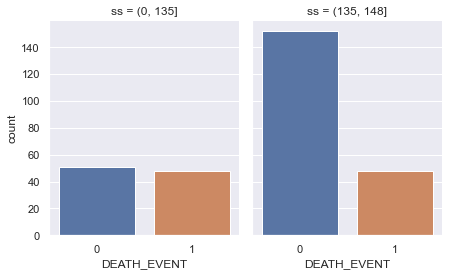

In [55]:
# divisão em grupos de SS em dois grupos
heart['ss'] = pd.cut(heart["serum_sodium"], [0,135,148])
sns.catplot(x="DEATH_EVENT", col="ss", kind="count", data=heart, height=4, aspect=.8)
plt.show()

Observa-se que a maioria dos obitos ocorreu no grupo com SS<135, valor considera de risco. 

## Tempo
Análise do tempo de acompanhamento dos pacientes

In [56]:
heart['time'].describe()

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64

In [57]:
fig_hist_time = px.histogram(heart, x=heart['time'], nbins=70, marginal="box")
fig_hist_time.show()

Não nota-se nenhum outlier nos dados

In [58]:
ss=px.histogram(heart,x="time",nbins=30,color="DEATH_EVENT", marginal="violin")
ss.show()

Observa-se que ocorreram muitas mortes logo no inicio do periodo de companhamento dos pacientes 

## Conclusão parcial

Como conclusão parcial, obsevou-se que maiores idades, possuir niveis de creatinina sérica maior que 1,5), maior nível de anemia, menores valores de fração de ejeção (FE) e que possua hiponatremia (SS), fazem com que haja maiores chances do paciente falecer 

Não foi notado uma influencia do tabagismo, diabetes, pressão alta e sexo.

# Anova

Por meio dos gráficos da variável DEATH_EVENT em função dos fatores principais pode-se observar uma grade quantidade de outliers,. Além disso, em alguns dos casos não se notou um padrão clado da correlação.
Para compreender esses fatores influencia na variável resposta, foi realizada uma análise de variáncia (ANOVA), com 95% de confiabilidade.

Primeiramente foi realizada a análise na modalidade `one-way`, para compreender se cada um dos fatores principais exerciam alguma influencia na morte dos pacientes.
Em seguida foi realizada uma análise na modalidade `two-way`, para a qual foram utilizados todos os fatores princiapais, visando uma análise global. 


In [59]:
# one-way ANOVA

print ("IDADE")
age = ols('DEATH_EVENT ~ age', data = heart).fit()
aov_age = sm.stats.anova_lm(age, typ=2)
print (aov_age)
print ()

print ("ANEMIA")
anaemia = ols('DEATH_EVENT ~ anaemia', data = heart).fit()
aov_anaemia = sm.stats.anova_lm(anaemia, typ=2)
print (aov_anaemia)
print ()

print ("CPK")
cpk = ols('DEATH_EVENT ~ creatinine_phosphokinase', data = heart).fit()
aov_cpk = sm.stats.anova_lm(cpk, typ=2)
print (aov_cpk)
print ()

print ("DIABETES")
diabetes = ols('DEATH_EVENT ~ diabetes', data = heart).fit()
aov_diabetes = sm.stats.anova_lm(diabetes, typ=2)
print (aov_diabetes)
print ()

print ("EJECTION FRACTION")
ef = ols('DEATH_EVENT ~ ejection_fraction', data = heart).fit()
aov_ef = sm.stats.anova_lm(ef, typ=2)
print (aov_ef)
print ()

print ("PRESSÃO ALTA")
hbp = ols('DEATH_EVENT ~ high_blood_pressure', data = heart).fit()
aov_hbp = sm.stats.anova_lm(hbp, typ=2)
print (aov_hbp)
print ()

print ("PLAQUETAS")
plaquetas = ols('DEATH_EVENT ~ platelets', data = heart).fit()
aov_plaquetas = sm.stats.anova_lm(plaquetas, typ=2)
print (aov_plaquetas)
print ()

print ("S. CREATININA")
sc = ols('DEATH_EVENT ~ serum_creatinine', data = heart).fit()
aov_sc = sm.stats.anova_lm(sc, typ=2)
print (aov_sc)
print ()

print ("SEXO")
sexo = ols('DEATH_EVENT ~ sex', data = heart).fit()
aov_sexo = sm.stats.anova_lm(sexo, typ=2)
print (aov_sexo)
print ()

print ("S. SÓDIO")
ss = ols('DEATH_EVENT ~ serum_sodium', data = heart).fit()
aov_ss = sm.stats.anova_lm(ss, typ=2)
print (aov_ss)
print ()

print ("FUMANTE")
fumante = ols('DEATH_EVENT ~ smoking', data = heart).fit()
aov_fumante = sm.stats.anova_lm(fumante, typ=2)
print (aov_fumante)
print ()

print ("TEMPO")
time = ols('DEATH_EVENT ~ time', data = heart).fit()
aov_time = sm.stats.anova_lm(time, typ=2)
print (aov_time)
print ()


IDADE
             sum_sq     df          F    PR(>F)
age        4.191100    1.0  20.410478  0.000009
Residual  60.986158  297.0        NaN       NaN

ANEMIA
             sum_sq     df         F    PR(>F)
anaemia    0.286241    1.0  1.310096  0.253299
Residual  64.891017  297.0       NaN       NaN

CPK
                             sum_sq     df         F    PR(>F)
creatinine_phosphokinase   0.256461    1.0  1.173259  0.279611
Residual                  64.920797  297.0       NaN       NaN

DIABETES
             sum_sq     df         F    PR(>F)
diabetes   0.000246    1.0  0.001121  0.973312
Residual  65.177011  297.0       NaN       NaN

EJECTION FRACTION
                      sum_sq     df          F    PR(>F)
ejection_fraction   4.702392    1.0  23.094063  0.000002
Residual           60.474866  297.0        NaN       NaN

PRESSÃO ALTA
                        sum_sq     df         F    PR(>F)
high_blood_pressure   0.410394    1.0  1.881937  0.171149
Residual             64.766863  297.

Os fatores principais que se mostraram influentes no falecimento dos pacientes são:
- age, ejection_fraction, serum_creatinine, serum_sodium e time.

In [60]:
# two-way ANOVA

dados = ols('DEATH_EVENT ~ age+anaemia+creatinine_phosphokinase+diabetes+ejection_fraction+high_blood_pressure+platelets+serum_creatinine+serum_sodium+sex+smoking+time ', data = heart).fit()
aov_dados = sm.stats.anova_lm(dados, typ=2)
print (aov_dados)


                             sum_sq     df          F        PR(>F)
age                        1.263445    1.0   9.505786  2.248255e-03
anaemia                    0.000490    1.0   0.003683  9.516486e-01
creatinine_phosphokinase   0.308769    1.0   2.323089  1.285716e-01
diabetes                   0.025496    1.0   0.191826  6.617318e-01
ejection_fraction          3.779970    1.0  28.439379  1.966594e-07
high_blood_pressure        0.012970    1.0   0.097584  7.549759e-01
platelets                  0.019073    1.0   0.143502  7.051055e-01
serum_creatinine           2.145106    1.0  16.139147  7.529471e-05
serum_sodium               0.304165    1.0   2.288450  1.314442e-01
sex                        0.206349    1.0   1.552506  2.137855e-01
smoking                    0.001685    1.0   0.012678  9.104293e-01
time                      11.779898    1.0  88.628478  1.648479e-18
Residual                  38.013185  286.0        NaN           NaN


Em conjunto os seguinte fatores apresentam interação significativa são:
- age, ejection_fraction, serum_creatinine, e time

Com base na ANOVA e nos gráficos de correlação, serão plotados gráficos  entre age, sex, time, ejection_fraction e serum_creatinine, para compreer  como esses fatores se correlacionam com a morte dos pacientes.

# Análise das combinações

## Análise: sexo, idade e morte

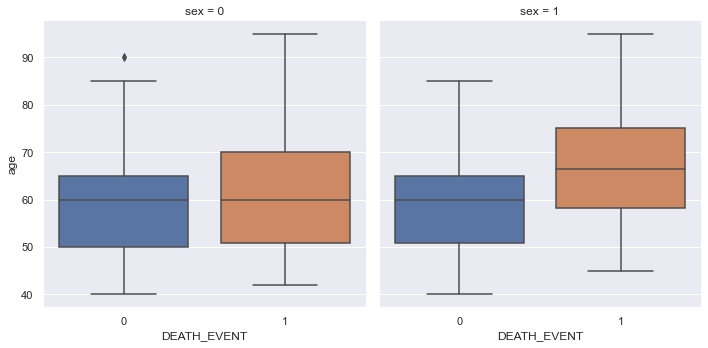

In [61]:
sns.catplot(x="DEATH_EVENT", y="age", col="sex", kind="box", data=heart)
plt.show()

Pela distribuição dos dados nota-se que as mulheres faleceram mais jovens que os homens.

## Análise: sexo, tempo, morte

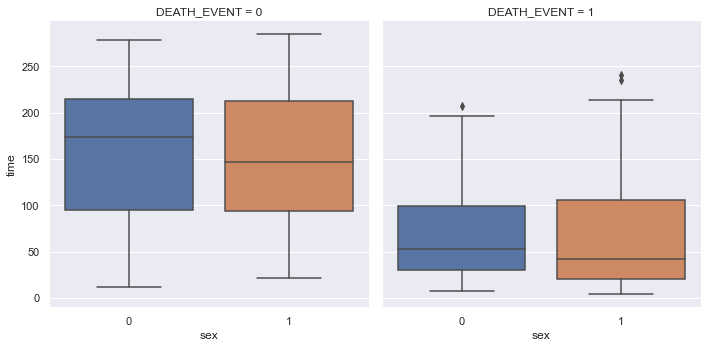

In [62]:
sns.catplot(x= "sex", y="time", col="DEATH_EVENT", kind="box", data=heart)
plt.show()

Observa-se que dos pacientes que sobreviveram, em média o companhamento foi proximo entre 150 e 170 dias.
Já para os que faleceram foi de proximo de 50 dias. 
Quando se análise os quartis, nota-se que  de inicio os homens falecarm mais rapdo que as mulhres ( até 50%), depois disso  as mulhres falecarem mais rápido que os homens.

O que sugere que os homens que sobrevivem aos primeiros 50 dias de acompanhamento conseguem resistir por mais tempo.


## Análise: tempo e idade

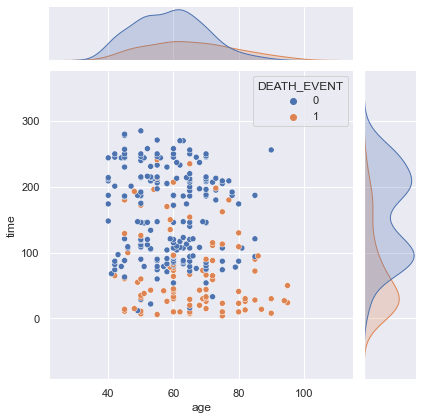

In [63]:
sns.jointplot(data= heart,x="age", y="time", hue ="DEATH_EVENT", kind='scatter')

Nota-se que quanto mais velho for o paciente, mais rápido ele morrerá.

## Análise: Idade e sódio

In [64]:
fig = px.scatter(heart, x="age", y="serum_sodium", color="DEATH_EVENT", marginal_y="box",
           marginal_x="box", trendline="ols", template="simple_white", width=1000)
fig.show()

Para uma melhor compreensão dos dos foi necessário fazer uma limpeza dos dados de sódio

In [65]:
def filtrar_outliers(atributo):
    Q1 = heart[atributo].quantile(0.25)
    Q3 = heart[atributo].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (heart[atributo] >= Q1 - 1.5 * IQR) & (heart[atributo] <= Q3 + 1.5 *IQR)
    filtrado = heart.loc[filter]  
    return filtrado

dados_filtrados_SS = filtrar_outliers ('serum_sodium')

In [66]:
fig = px.scatter(dados_filtrados_SS, x="age", y="serum_sodium", color="DEATH_EVENT", marginal_y="box",
           marginal_x="box", trendline="ols", template="simple_white", width=1000)
fig.show()

Pelo R² nota-se que essa combinação não explica muito bem os dados, visto que seu valor menor que 5%.
Além disso, não se nota um padrão na distribuição dos dados

## Análise: CPK e sexo

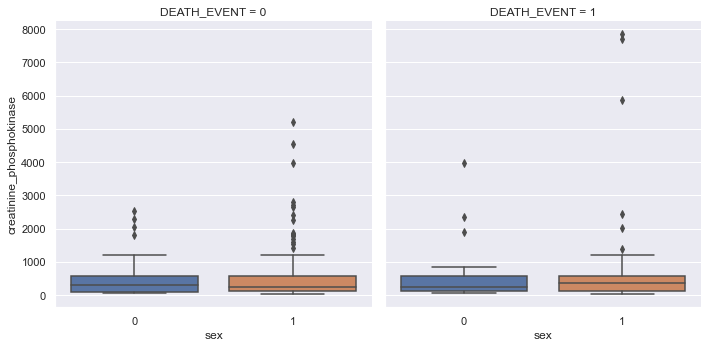

In [67]:
sns.catplot(x= "sex", y="creatinine_phosphokinase", col="DEATH_EVENT", kind="box", data=heart)
plt.show()

Devida a grande quantidade de outlier, é necessário fazer uma limpeza para melhor compreensão dos dados

## Análise: CPK e sexo

In [68]:
heart.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'grupos_idades', 'ef', 'pt', 'sc', 'ss'],
      dtype='object')

In [69]:
def filtrar_outliers(atributo):
    Q1 = heart[atributo].quantile(0.25)
    Q3 = heart[atributo].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (heart[atributo] >= Q1 - 1.5 * IQR) & (heart[atributo] <= Q3 + 1.5 *IQR)
    filtrado = heart.loc[filter]  
    return filtrado

dados_filtrados_CPK = filtrar_outliers ('creatinine_phosphokinase')

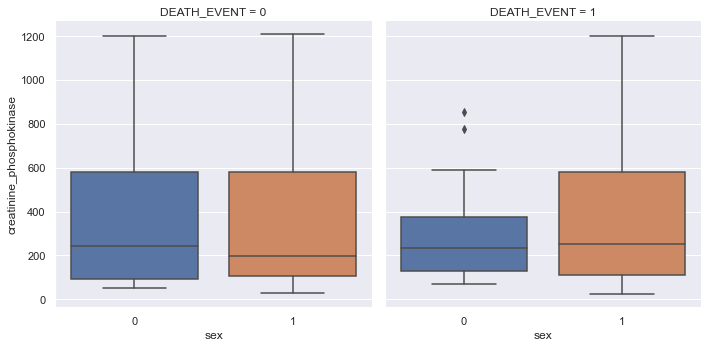

In [70]:
sns.catplot(x= "sex", y="creatinine_phosphokinase", col="DEATH_EVENT", kind="box", data=dados_filtrados_CPK)
plt.show()

Pode-se notar que a quantidade de as mulheres que faleram foi menor que a de homens em função do nivel de CPK no sangue.
Os valores de referência da CPK são:
- Homens: entre 30.00 U/L e 200.00 U/L 
- Mulhueres 29.00 U/L e 168.00 U/L 
<br>

<br>
Sendo assim, nota-se que para ambos os sexos metade os obtidos ocorrem para valores acima de 200.

## Análise: serum creatinine e  ejection fraction

In [71]:
fig = px.scatter(heart, x="ejection_fraction", y="serum_creatinine", color="DEATH_EVENT", marginal_y="box",
           marginal_x="box", trendline="ols", template="simple_white", title="Ejection Fraction x Serum Creatinine", width=1000)
fig.show()

Apesar do artigo citar que esses são os fatores significativos para a predição do obito do paciente, ao análisar o gráfico observa-se que a quantidade de outliers acaba prejudicando uma visualização do padão da distribuição.

Por isso foi feito uma limpeza  do fator ejection_fraction, para uma melhor visualização da interação entre os fatores. 

In [72]:
def filtrar_outliers(atributo):
    Q1 = heart[atributo].quantile(0.25)
    Q3 = heart[atributo].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (heart[atributo] >= Q1 - 1.5 * IQR) & (heart[atributo] <= Q3 + 1.5 *IQR)
    filtrado = heart.loc[filter]  
    return filtrado

dados_filtrados_EF = filtrar_outliers ('ejection_fraction')

In [73]:
fig = px.scatter(dados_filtrados_EF, x="ejection_fraction", y="serum_creatinine", color="DEATH_EVENT", marginal_y="box",
           marginal_x="box", trendline="ols", template="simple_white", title="Ejection Fraction x Serum Creatinine", width=1000)
fig.show()

In [74]:
def filtrar_outliers(atributo):
    Q1 = dados_filtrados_EF[atributo].quantile(0.25)
    Q3 = dados_filtrados_EF[atributo].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (dados_filtrados_EF[atributo] >= Q1 - 1.5 * IQR) & (dados_filtrados_EF[atributo] <= Q3 + 1.5 *IQR)
    filtrado = dados_filtrados_EF.loc[filter]  
    return filtrado

dados_filtrados_EFeSC = filtrar_outliers ('serum_creatinine')

In [75]:
fig = px.scatter(dados_filtrados_EFeSC, x="ejection_fraction", y="serum_creatinine", color="DEATH_EVENT", marginal_y="box",
           marginal_x="box", trendline="ols", template="simple_white", title="Ejection Fraction x Serum Creatinine", width=1000)
fig.show()

Depois das limpezas é possivel observar que com uma baixa ejeção de sangue e valores mais elevados de serum_creatinine, há um maior número de obitos.
Entretanto o valor de R² é menor que 5%.

Para verificar como é essas distribuição entre os sexos foi plotado um gráfico de distribuição por sexo. 


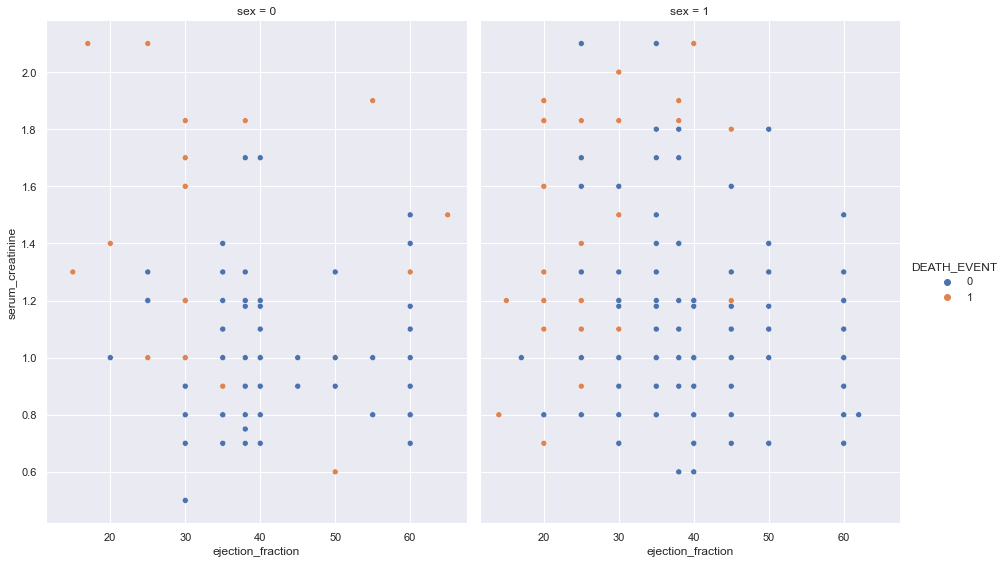

In [76]:
sns.relplot(x="ejection_fraction", y="serum_creatinine", col="sex", hue="DEATH_EVENT", height=8, aspect=0.8, data=dados_filtrados_EFeSC)
plt.show()

Pela distribuição dos dados observa-se que essa relação de EF e SC com a morte foi mais elefiva para os homens.

Alem disso, observa-se que mulheres com EF =30 e SC >1 todas faleceram, fato similar ocorreu para homens com EF =20

# Gráfico Interativo

Como uma forma de conhcer a probabilidades do paciente falecer ou não, em função dos fatores, foi gerado um gráfico interativo, visando simular as diversas combinações entre os fatores e assim obter as porcentagem de pacientes que faleceram a depender dessa combinação.

In [77]:
#Separa as idades em grupos e cria dummies para separar o sexo em duas colunas.
df2 = pd.get_dummies(heart, columns=['sex']).rename(columns={"sex_1": "male", "sex_0": "female"})

df3 = pd.get_dummies(pd.cut(df2.age, [40,50,60,70,95]))

df2["grupo_1"] = df3.iloc[:,0]
df2["grupo_2"] = df3.iloc[:,1]
df2["grupo_3"] = df3.iloc[:,2]
df2["grupo_4"] = df3.iloc[:,3]

df = df2[['DEATH_EVENT', 'male','female','smoking','anaemia', 'diabetes', 'high_blood_pressure','grupo_1','grupo_2','grupo_3','grupo_4']]


cond = ['DEATH_EVENT', 'male','female','smoking','anaemia', 
        'diabetes', 'high_blood_pressure','grupo_1','grupo_2','grupo_3','grupo_4']
#Transforma uma lista de True/False em uma lista contendo os atributos que são true
def prob11(q):
    lista = []
    num = []
    for i in range(11):
        num.append(q[i])
    
    if not any(num[1:]):
        return 0
    else: 
        for i in range(11):
            if q[i]:
                lista.append(cond[i])
        return lista

#Cria uma string com as condições a serem selecionadas na query.
def texto_query(q):
    if not any(q[1:]):
        return False
    else: 
        lista9 = prob11(q).copy()
        for i in ['DEATH_EVENT']:
            if i in lista9:
                lista9.remove(i)
        if not lista9:
            return False

        else:
            if 'male' in lista9 and 'female' in lista9:
                if len(lista9)==2:
                    return False
                else:
                    lista9.remove('male')
                    lista9.remove('female')
            
            st = st1 = ''
            
            if lista9[0] not in ['grupo_1','grupo_2','grupo_3','grupo_4']:
                st = lista9[0] + '==1'
                for i in lista9[1:]:
                    if i not in ['grupo_1','grupo_2','grupo_3','grupo_4']:
                        st = st + ' & ' + i + '==1'
     
            if sum(q[-4::]) >=1:
                grupos = list(set(prob11(q)).intersection(set(['grupo_1','grupo_2','grupo_3','grupo_4'])))
                st1 = '(' + grupos[0] + '==1'
                for i in grupos[1:]:
                    st1 = st1 + ' | ' + i + '==1' 
                st1 = st1 + ')'
            
            if st!='' and st1!='':
                return st + ' & ' + st1 
            elif st!='' and st1=='':
                return st
            elif st=='' and st1!='':
                return st1

#Similiar à função anterior, mas considera os pacientes que faleceram.
def texto_query_morte(q):
    if not any(q[1:]):
        return False
    else: 
        lista9 = prob11(q).copy()
        for i in []:
            if i in lista9:
                lista9.remove(i)
        if not lista9:
            return False

        else:
            if 'male' in lista9 and 'female' in lista9:
                if len(lista9)==2:
                    return False
                else:
                    lista9.remove('male')
                    lista9.remove('female')
            
            st = st1 = ''
            
            if lista9[0] not in ['grupo_1','grupo_2','grupo_3','grupo_4']:
                st = lista9[0] + '==1'
                for i in lista9[1:]:
                    if i not in ['grupo_1','grupo_2','grupo_3','grupo_4']:
                        st = st + ' & ' + i + '==1'
     
            if sum(q[-4::]) >=1:
                grupos = list(set(prob11(q)).intersection(set(['grupo_1','grupo_2','grupo_3','grupo_4'])))
                #st = st + ' & ('
                st1 = '(' + grupos[0] + '==1'
                for i in grupos[1:]:
                    st1 = st1 + ' | ' + i + '==1' 
                st1 = st1 + ')'
            
            if st!='' and st1!='':
                return st + ' & ' + st1 
            elif st!='' and st1=='':
                return st
            elif st=='' and st1!='':
                return st1
            
            
#calcula a probabilidade de estar naquele grupo.      
def prob1(q):
    if not texto_query(q):
        return 100
    else:
        return 100*len(df.query(texto_query(q)))/len(heart)

#calcula a probabilidade de estar naquele grupo e de morrer.
def prob2(q):        
    if not texto_query(q):
        return 100*len(df.query('DEATH_EVENT==1'))/len(heart)
    else:
        return 100*len(df.query(texto_query_morte(q)))/len(heart)
#calcula a quantidade de pacientes com aquela condição
def qtd_pacientes(q):   
    if not texto_query(q):
        return len(heart)
    else:
        return len(df.query(texto_query(q)))
#calcula a quantidade de pacientes com aquela condição e morreram.
def qtd_mortos(q):   
    if not texto_query(q):
        return len(df.query('DEATH_EVENT==1'))
    else:
        return len(df.query(texto_query_morte(q)))
#calcula a probabilidade de morrer dado que está naquele grupo.
def prob_morrer(q):       
    if not texto_query(q):
        return 100*len(df.query('DEATH_EVENT==1'))/len(heart)
    else:
        return 100*len(df.query(texto_query_morte(q)))/len(df.query(texto_query(q)))

        

<IPython.core.display.Javascript object>


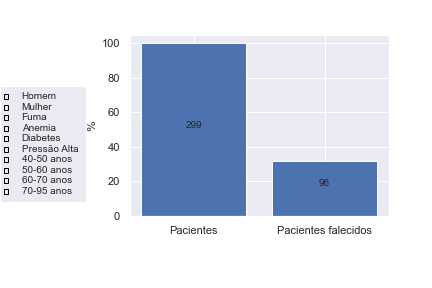

In [78]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, RadioButtons, CheckButtons

q = [True, False, False ,False, False, False, False, False, False, False, False]
x = ['Pacientes', 'Pacientes falecidos']
y = [prob1(q), prob2(q)]

fig = plt.figure()
ax = fig.subplots()
plt.subplots_adjust(left = 0.3, bottom = 0.25)
p1, p2 = ax.bar(x, y, label = 'Plot 1')
ax.set_ylabel('%')

plots =[p1, p2]
activated = [False, False ,False, False, False, False, False, False, False, False] #define quais botões começam ativados
labels = ['Homem','Mulher','Fuma','Anemia','Diabetes','Pressão Alta','40-50 anos','50-60 anos','60-70 anos',
          '70-95 anos']

ax_check = plt.axes([0, 0.3, 0.2, 0.4])
plot_button = CheckButtons(ax_check,labels, activated)

texto = ax.text(.5, 50,'', fontsize=10)

height1 = p1.get_height()
alt1 = ax.text(p1.get_x() + p1.get_width() / 2.0, height1/2, f'{round(qtd_pacientes(q),2)}', ha='center', va='bottom')

height2 = p2.get_height()
alt2 = ax.text(p2.get_x() + p2.get_width() / 2.0, height2/2, f'{round(qtd_mortos(q),2)}', ha='center', va='bottom')

def select_plot(label):
    
    index = labels.index(label)
    q[index+1] = not q[index+1]
    y = [prob1(q), prob2(q)]
    p1.set_height(y[0])
    p2.set_height(y[1])
    texto.set_text(f'Probabilidade de morrer \n {round(prob_morrer(q),2)}%')
       
    alt1.set_position((0,p1.get_height()/2))
    alt2.set_position((1,p2.get_height()/2))
    
    alt1.set_text(f'{round(qtd_pacientes(q),2)}')
    alt2.set_text(f'{round(qtd_mortos(q),2)}')
    
    plt.draw() 

plot_button.on_clicked(select_plot)
plt.show()

# Conclusões Gerais 

Segundo o artigo base e baseados em nossas análises, o estudo foi realizado com 299 pacientes paquistaneses (105 mulheres e 194 homens) com mais de 40 anos e que possuiam disfunção sistólica do ventrículo esquerdo e caíam nas classes III e IV da NYHA. 

O acompanhamento dos pacientes foi entre 4 e 285 dias, com uma média de 130 dias.  Além disso, foram estudados a idade, sódio sérico, creatinina sérica, sexo, tabagismo, pressão arterial (HBP), fração de ejeção (EF), anemia, plaquetas, creatinina fosfoquinase (CPK) e diabetes. Esse fatores foram escolhidos por serem considerados como variáveis ​​potenciais para explicar a mortalidade dos pacientes.


Com base em nossos conhecimentos concluímos que, apesar de ser muito falado que a pressão alta é um dos grandes problemas cardíacos, pelo grupo de pacientes estudados nota-se que esse fator não é estatisticamente significativo e sua contrbuição é de apenas 5%.

Além disso, os fatores diabetes, tabagismo, sexo, CPK, sódio sérico, anemia e plaquetas, também não se mostram significativamente influentes.

Constatou-se que a probabilidade de um paciente com diabetes falecer é de 32%, fumante é de 31,25%, sendo que  essas porcentagens são menores que na análise da população geral. Já no caso de ser anêmico a porcentagem é de 
35,66% tendo um aumento de chances de morrer de apenas 3,5%.
Com relação ao sexo, o fato de ser mulher a chance de falecer é de 32,38% e se for homem de 31,95%.

Segundo a literatura, tanto  CPK, creatinina sérica e sódio sérico  estão ligados ao funcionamento dos músculos. Sendo que quando o tecido muscular se danifica ele acaba liberando no sangue componentes como a enzima CPK e a creatinina sérica, bem como baixo nível de sódio faz com que o funcionamento dos tecidos musculares sejam prejudicados. Porém, mesmo todos esses fatores sendo indicadores de que um infarto ocorreu, somente a creatinina sérica se mostrou influente para o resultado final. 

Com relação aos fatores significativos, vemos que a maior porcentagem de chances de falecer estão no grupo de 70 a 95 anos, com baixo tempo de acompanhamento, uma fração de ejeção baixa e creatinina sérica acima de 1,5.  
Já os pacientes que tem maiores chances de sobreviver são os que estão no grupo de 50 a 58 anos, com alto tempo de acompanhamento, alta fração de ejeção e creatinina sérica abaixo de 1,5.

# Referências
HOSPITAL ISRAELITA ALBERT EINSTEIN(ed). Hiponatremia, disponievl em <https://www.einstein.br/doencas-sintomas/hiponatremia>, acesso em 19/11/2021<br>

BARBOSA, R R et al. Hemoglobina e sódio séricos: marcadores prognósticos precoces na insuficiência cardíaca descompensada. INSUFICIENCIA CARDIACA, v. 14, n. 1, p. 2-6, 2019.<br>

CHICCO, D; JURMAN, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).<br>